In [2]:
import matplotlib
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_circles
import sklearn

In [3]:
print ("tensorflow version: ", tf.__version__)
print ("numpy version: ", np.__version__)
print ("pandas version: ", pd.__version__)
print ("sklearn version: ", sklearn.__version__)

tensorflow version:  2.16.2
numpy version:  1.26.4
pandas version:  2.2.2
sklearn version:  1.5.1


In [4]:
X,y = make_circles(n_samples=1000, noise=0.05, random_state=42)
X.shape

(1000, 2)

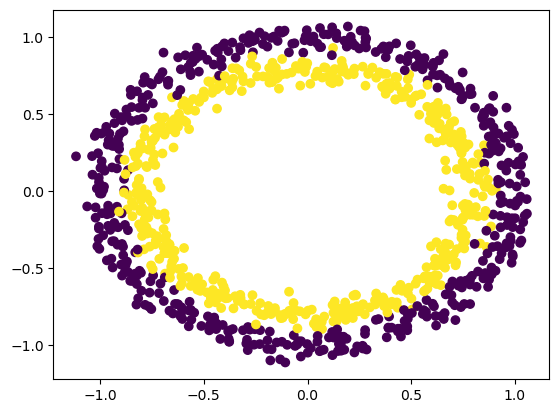

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(200,activation="relu"),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [32]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 10**(epoch/20))
history = model.fit(X, y, epochs=50, verbose=1, callbacks=[lr_scheduler])

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5029 - loss: nan - learning_rate: 1.0000
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5008 - loss: nan - learning_rate: 1.1220
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5059 - loss: nan - learning_rate: 1.2589
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4909 - loss: nan - learning_rate: 1.4125
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5053 - loss: nan - learning_rate: 1.5849
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5125 - loss: nan - learning_rate: 1.7783
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4972 - loss: nan - learning_rate: 1.9953
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5127 - loss: nan - learning_rate: 2.2387
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5097 - loss: nan - learning_rate: 2.5119
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - ac

<Axes: >

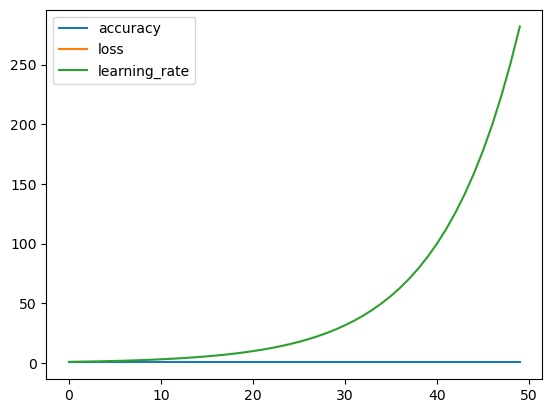

In [33]:
pd.DataFrame(history.history).plot()

In [22]:
model.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9693 - loss: 0.0712


[0.0745130106806755, 0.9700000286102295]

In [11]:
def plotDecisionBoundry(model,x,y):
    """plots a decision boundry created by a model"""
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
    xx,yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    x_in = np.c_[xx.ravel(), yy.ravel()]
    z=model.predict(x_in)
    if len(z[0])>1:
        print("multiclass classification")
        z = np.argmax(z,axis=1).reshape(xx.shape)
    else:
        print("binary classification")
        z = np.round(z).reshape(xx.shape)
    plt.contourf(xx,yy,z,cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.scatter(x[:,0],x[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)
    
    

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step
binary classification


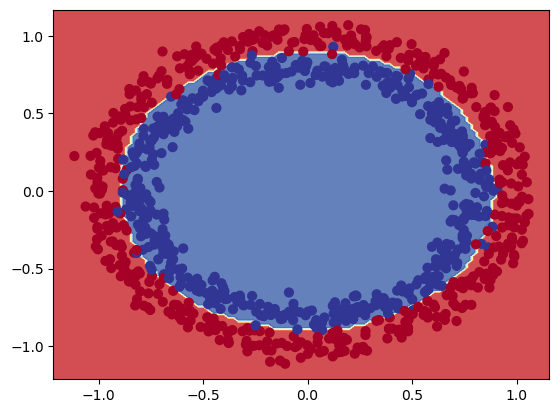

In [12]:
plotDecisionBoundry(model,X,y)